# Import relevant packages

In [1]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

# Generate data

In [3]:
n_samples = 1500
circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
examples = [circles, moons, blobs, no_structure]

In [4]:
def format_datasets(dataset):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    return X

# Choose algorithms to compare

In [5]:
clustering_names = ["KMeans", "DBSCAN"]

In [6]:
def create_algorithms():
    kmeans = cluster.KMeans(n_clusters=2, random_state=42)
    dbscan = cluster.DBSCAN(eps=.2)
    algorithms = [kmeans, dbscan]
    return algorithms

# Plot configuration

In [7]:
#plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.figure(figsize=(30,30))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

<Figure size 2160x2160 with 0 Axes>

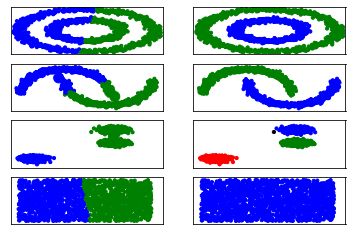

In [8]:
plot_num = 1
## K-means
for i, dataset in enumerate(examples):
    X = format_datasets(dataset)
    clustering_algorithms = create_algorithms()

    for algorithm in clustering_algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)


        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

In [9]:
plt.show()

Difference distances:
    - euclidean
    - cosine
    - manhattan
    - jaccard
    - edit distance
    - any other customised distance metric

Cluster  customers based on their purchase histories
cluster products based on the sets of customers who purchased them
cluster documents based on similar words
cluster DNA sequences based on edit distance